In [2]:
import pandas as pd

df = pd.read_csv("../dataset/weatherHistory.csv")
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)
df = df.set_index('Formatted Date')

df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<AxesSubplot:xlabel='Summary'>

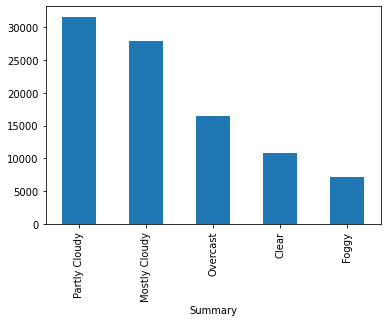

In [3]:
import matplotlib.pyplot as plt

precip_totals = (df
    .groupby("Summary")["Precip Type"]
    .count()
    .sort_values(ascending=False)
    .head(5)
)
precip_totals.plot(kind="bar", fontsize=10)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-03-31 22:00:00+00:00 to 2016-09-09 21:00:00+00:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


If u want to learn  a model that u convert Formatted Date non-null  object -> to_date format

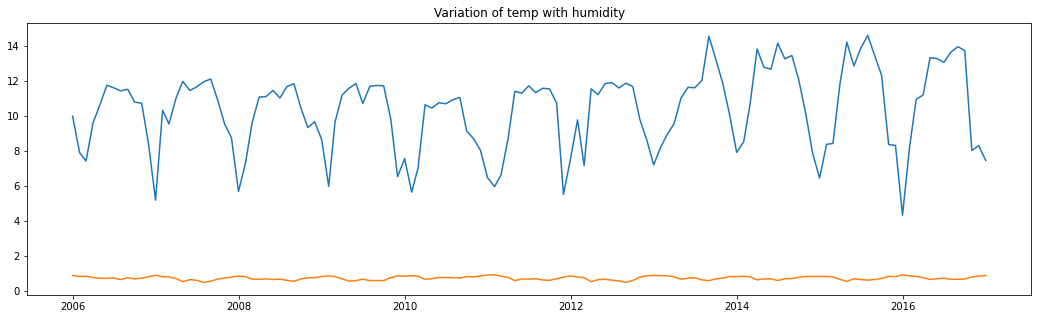

In [4]:
m_dataset = df[['Visibility (km)', 'Humidity']]
m_dataset = m_dataset.resample('M').mean()
plt.figure(figsize=(18,5))
plt.title('Variation of temp with humidity')
plt.plot(m_dataset)

<AxesSubplot:>

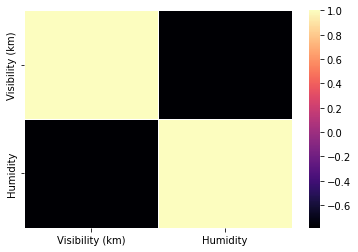

In [5]:
import seaborn as sns
correlation = m_dataset.corr()
sns.heatmap(correlation, linewidths=.5, cmap="magma")

# Check correlation between 'Visibility (km)', 'Humidity' -> Low correlation 
